In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
# from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D

In [3]:
IMAGE_SIZE = [224, 224]

train_path = '/Users/akshayadlakha/Downloads/Dataset/Train'
test_path = '/Users/akshayadlakha/Downloads/Dataset/Test'

In [4]:
base_model = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 

In [5]:
for layer in base_model.layers:
    layer.trainable = False

In [6]:
from glob import glob

folders = glob('/Users/akshayadlakha/Downloads/Dataset/Train/*')

folders

['/Users/akshayadlakha/Downloads/Dataset/Train/Parasite',
 '/Users/akshayadlakha/Downloads/Dataset/Train/Uninfected']

In [7]:
base_model

In [8]:
x = Flatten()(base_model.output)

In [9]:
model = Model(inputs=base_model.input, outputs=Dense(len(folders), activation='softmax')(x))

In [10]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [11]:
# model=Sequential()
# model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(500,activation="relu"))
# model.add(Dense(2,activation="softmax"))
# model.summary()

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('/Users/akshayadlakha/Downloads/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/Users/akshayadlakha/Downloads/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 134 images belonging to 2 classes.


In [17]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
13/13 [==============================] - 84s 6s/step - loss: 0.7175 - accuracy: 0.6346 - val_loss: 1.0464 - val_accuracy: 0.4179
Epoch 2/25
13/13 [==============================] - 87s 7s/step - loss: 0.4988 - accuracy: 0.7500 - val_loss: 0.4530 - val_accuracy: 0.7313
Epoch 3/25
13/13 [==============================] - 88s 7s/step - loss: 0.4049 - accuracy: 0.8077 - val_loss: 0.4593 - val_accuracy: 0.7836
Epoch 4/25
13/13 [==============================] - 88s 7s/step - loss: 0.3564 - accuracy: 0.8341 - val_loss: 0.4196 - val_accuracy: 0.7985
Epoch 5/25
13/13 [==============================] - 91s 7s/step - loss: 0.3451 - accuracy: 0.8510 - val_loss: 0.3729 - val_accuracy: 0.8209
Epoch 6/25
13/13 [==============================] - 95s 7s/step - loss: 0.2747 - accuracy: 0.8918 - val_loss: 0.3662 - val_accuracy: 0.8284
Epoch 7/25
13/13 [==============================] - 107s 8s/step - loss: 0.2665 - accuracy: 0.8870 - val_loss: 0.3585 - val_accuracy: 0.8507
Epoch 8/25
13/13 [=

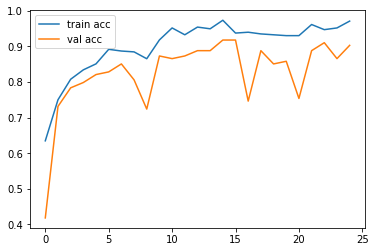

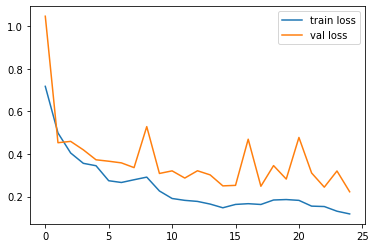

In [18]:
# accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [19]:
y_pred = model.predict(test_set)

In [20]:
y_pred

array([[6.92273438e-01, 3.07726622e-01],
       [1.64288118e-01, 8.35711896e-01],
       [9.94068146e-01, 5.93189569e-03],
       [9.06441867e-01, 9.35581326e-02],
       [9.96429980e-01, 3.57008330e-03],
       [1.70634821e-01, 8.29365253e-01],
       [6.05492927e-02, 9.39450681e-01],
       [5.38432419e-01, 4.61567581e-01],
       [9.69832540e-01, 3.01674809e-02],
       [6.70183301e-01, 3.29816669e-01],
       [5.82030594e-01, 4.17969435e-01],
       [8.40429068e-01, 1.59570992e-01],
       [1.98391423e-01, 8.01608622e-01],
       [2.25936130e-01, 7.74063885e-01],
       [9.94700432e-01, 5.29956445e-03],
       [2.02905834e-02, 9.79709387e-01],
       [5.39612055e-01, 4.60387945e-01],
       [9.91181135e-01, 8.81882478e-03],
       [1.97028279e-01, 8.02971721e-01],
       [4.82625127e-01, 5.17374873e-01],
       [9.96924341e-01, 3.07567092e-03],
       [9.99286950e-01, 7.13019224e-04],
       [6.66495040e-02, 9.33350503e-01],
       [2.53244668e-01, 7.46755302e-01],
       [9.989834

In [21]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0])

In [45]:
img=image.load_img('/Users/akshayadlakha/Downloads/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163047_cell_103.png',target_size=(224,224))

In [46]:
imgx=image.img_to_array(img)
imgx

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [47]:
imgx=imgx/255
imgx=np.expand_dims(imgx,axis=0)
img_data=preprocess_input(imgx)
img_data.shape

(1, 224, 224, 3)

In [48]:
result = model.predict(img_data)

In [49]:
result

array([[0.0414067, 0.9585933]], dtype=float32)

In [50]:
img1=image.load_img('/Users/akshayadlakha/Downloads/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_13.png',target_size=(224,224))

In [51]:
imgnor=image.img_to_array(img1)
imgnor

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [52]:
imgx=imgx/255
imgnor=np.expand_dims(imgnor,axis=0)
img_datanor=preprocess_input(imgnor)
img_datanor.shape

(1, 224, 224, 3)

In [53]:
resultnor = model.predict(img_datanor)
resultnor

array([[1., 0.]], dtype=float32)

In [70]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnetpre

In [71]:
model_resnet = ResNet50(input_shape=IMAGE_SIZE + [3],weights='imagenet', include_top=False)

for layer in model_resnet.layers:
    layer.trainable = False

In [72]:
resx = Flatten()(model_resnet.output)

In [73]:
predictionresnet = Dense(len(folders), activation='softmax')(resx)

modelresnet = Model(inputs=model_resnet.input, outputs=predictionresnet)

In [74]:
modelresnet.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [75]:
# modelresnet=Sequential()
# modelresnet.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
# modelresnet.add(MaxPooling2D(pool_size=2))
# modelresnet.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
# modelresnet.add(MaxPooling2D(pool_size=2))
# modelresnet.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
# modelresnet.add(MaxPooling2D(pool_size=2))
# modelresnet.add(Flatten())
# modelresnet.add(Dense(500,activation="relu"))
# modelresnet.add(Dense(2,activation="softmax"))
# modelresnet.summary()

In [76]:
modelresnet.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [77]:
resnet = modelresnet.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
13/13 [==============================] - 27s 2s/step - loss: 2.5111 - accuracy: 0.4808 - val_loss: 0.6194 - val_accuracy: 0.7687
Epoch 2/30
13/13 [==============================] - 26s 2s/step - loss: 1.0033 - accuracy: 0.5000 - val_loss: 0.5799 - val_accuracy: 0.8209
Epoch 3/30
13/13 [==============================] - 26s 2s/step - loss: 0.8025 - accuracy: 0.5865 - val_loss: 0.7862 - val_accuracy: 0.4179
Epoch 4/30
13/13 [==============================] - 26s 2s/step - loss: 0.7904 - accuracy: 0.5721 - val_loss: 0.5623 - val_accuracy: 0.7388
Epoch 5/30
13/13 [==============================] - 26s 2s/step - loss: 0.7170 - accuracy: 0.6106 - val_loss: 0.5288 - val_accuracy: 0.7985
Epoch 6/30
13/13 [==============================] - 26s 2s/step - loss: 0.6919 - accuracy: 0.5913 - val_loss: 0.6972 - val_accuracy: 0.4701
Epoch 7/30
13/13 [==============================] - 30s 2s/step - loss: 0.6811 - accuracy: 0.6106 - val_loss: 0.5271 - val_accuracy: 0.7910
Epoch 8/30
13/13 [==

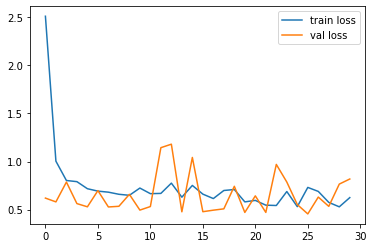

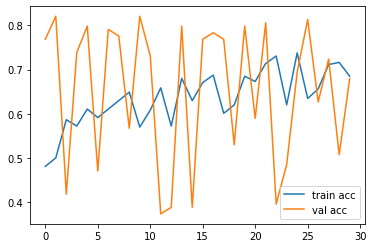

In [78]:
plt.plot(resnet.history['loss'], label='train loss')
plt.plot(resnet.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(resnet.history['accuracy'], label='train acc')
plt.plot(resnet.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [79]:
y_pred_res = modelresnet.predict(test_set)

In [80]:
y_pred_res = np.argmax(y_pred_res, axis=1)
y_pred_res

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [81]:
# modelresnet.predict(img_data)

In [82]:
# modelresnet.predict(img_datanor)

In [83]:
from keras.models import load_model

model.save('model_malariavgg19.h5')

In [ ]:
modelresnet.save('model_malaria resnetnew.h5')